In [1]:
from tools import heatmap_eval, UMAP_eval, eval_classifier, vis_classifier
import pandas as pd
import numpy as np


/opt/miniconda3/envs/condaenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


plotnine is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.
xgboost is already installed.
numpy is already installed.
scipy is already installed.


## Example Usage of Evaluation Methods

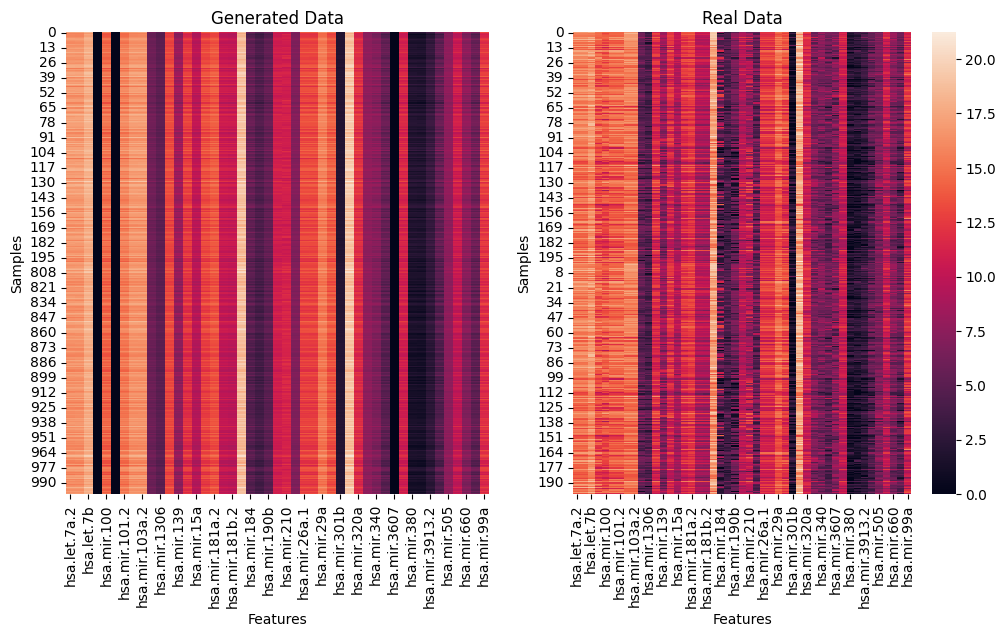

/opt/miniconda3/envs/condaenv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.


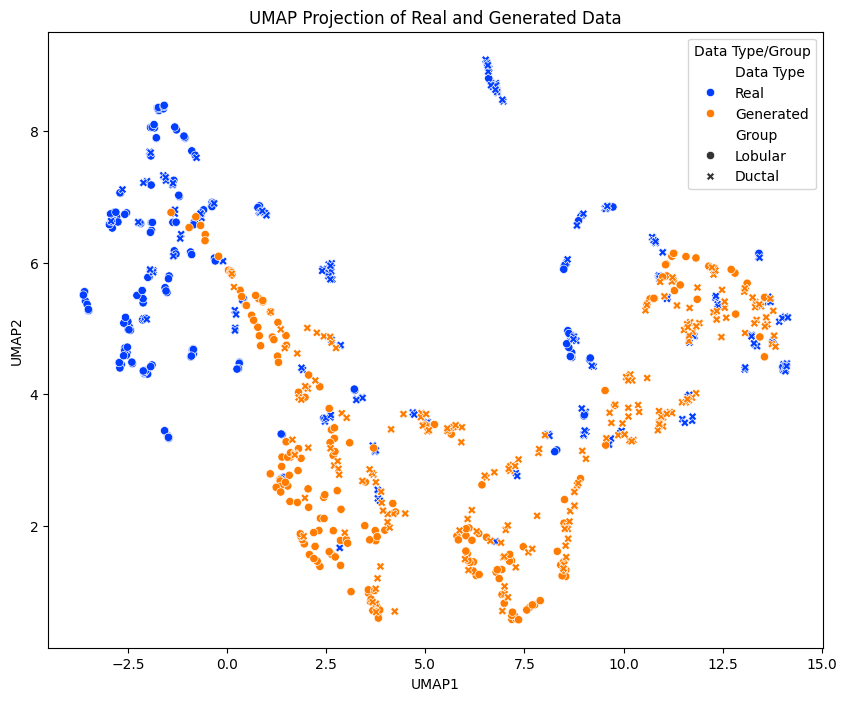

In [9]:
# Read in data
generated = pd.read_csv("Case/BRCASubtypeSel_train_epoch285_CVAE1-20_generated.csv", header=None)
real = pd.read_csv("Case/BRCASubtypeSel_test.csv",header = 0)

# Define the default group level
level0 = real['groups'].iloc[0]
level1 = list(set(real['groups']) - set([level0]))

# Get sample groups
groups_real = pd.Series(np.where(real['groups'] == "Infiltrating Ductal Carcinoma", "Ductal", "Lobular"))

groups_generated = pd.Series(np.where(generated.iloc[:, -1] == 1, "Ductal", "Lobular"))

# Get pure data matrices
real = real.select_dtypes(include=[np.number])
real = np.log2(real + 1)
generated = generated.iloc[:, :real.shape[1]]
generated.columns = real.columns

# Select samples for analysis to save running time
real_ind = list(range(200)) + list(range(len(real) - 200, len(real)))
generated_ind = list(range(200)) + list(range(len(generated) - 200, len(generated)))

# Call evaluation functions
h_subtypes = heatmap_eval(dat_real = real.iloc[real_ind,], dat_generated = generated.iloc[generated_ind,])
p_umap_subtypes = UMAP_eval(dat_real = real.iloc[real_ind,],
                            dat_generated = generated.iloc[generated_ind,],
                            groups_real = groups_real.iloc[real_ind],
                            groups_generated = groups_generated.iloc[generated_ind],
                            legend_pos = "bottom")


## Classification Accuracy

In [2]:
np.random.seed(333)

n_candidate = np.arange(20, 210, 10)  


n_target = np.array([230, 250, 270])  

In [11]:
# Evaluate the classifier for generated data
metric_generated = eval_classifier(whole_generated=generated,
                                   whole_groups=groups_generated,
                                   n_candidate=n_candidate,
                                   n_draw=2, log=True)

metric_generated.to_csv('metric_generated.csv', index=False)

20
0 LOGIS scores are clean and numeric: [1.   1.   0.75 0.   0.75]
SVM scores are clean and numeric: [0.75 0.75 0.75 0.5  0.75]
KNN scores are clean and numeric: [0.5  0.75 0.75 0.5  0.5 ]
RF scores are clean and numeric: [0.5  0.5  0.75 0.75 0.75]
XGB scores are clean and numeric: [0.75 0.75 0.5  0.   1.  ]
1 LOGIS scores are clean and numeric: [1.   0.75 1.   0.5  1.  ]
SVM scores are clean and numeric: [1.   0.5  0.75 0.5  0.75]
KNN scores are clean and numeric: [0.5 0.5 0.5 0.5 0.5]
RF scores are clean and numeric: [1.   0.5  1.   0.5  0.75]
XGB scores are clean and numeric: [0.75 0.75 1.   0.5  1.  ]
30
0 LOGIS scores are clean and numeric: [0.83333333 1.         0.83333333 0.66666667 0.5       ]
SVM scores are clean and numeric: [0.83333333 1.         0.83333333 0.66666667 0.5       ]
KNN scores are clean and numeric: [1.         1.         0.83333333 0.83333333 0.5       ]
RF scores are clean and numeric: [0.83333333 1.         0.83333333 0.66666667 0.5       ]
XGB scores are c

In [ ]:
# Evaluate the classifier for real data
metric_real = eval_classifier(whole_generated=real,
                              whole_groups=groups_real,
                              n_candidate=n_candidate,
                              n_draw=2, log=True)
metric_real.to_csv('metric_real.csv', index=False)

20
0 LOGIS scores are clean and numeric: [0.5  0.5  0.75 0.5  0.5 ]
SVM scores are clean and numeric: [0.5  0.5  0.5  0.75 0.5 ]
KNN scores are clean and numeric: [0.75 0.75 0.5  0.5  0.5 ]
RF scores are clean and numeric: [0.25 0.75 0.5  0.5  0.75]
XGB scores are clean and numeric: [0.25 1.   0.5  0.75 1.  ]
1 LOGIS scores are clean and numeric: [0.75 0.5  0.25 0.5  0.75]
SVM scores are clean and numeric: [0.75 0.5  0.75 0.75 0.75]
KNN scores are clean and numeric: [1.   0.5  0.75 0.75 0.75]
RF scores are clean and numeric: [1.   0.5  0.75 0.75 0.75]
XGB scores are clean and numeric: [1.   0.25 0.75 0.75 0.5 ]
30
0 LOGIS scores are clean and numeric: [0.66666667 0.83333333 0.66666667 0.66666667 0.83333333]
SVM scores are clean and numeric: [0.66666667 1.         0.66666667 0.66666667 1.        ]
KNN scores are clean and numeric: [0.5        0.5        0.5        0.66666667 0.66666667]
RF scores are clean and numeric: [0.66666667 0.83333333 0.66666667 0.5        1.        ]
XGB scores 

/opt/miniconda3/envs/condaenv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


LOGIS scores are clean and numeric: [0.76315789 0.73684211 0.76315789 0.81578947 0.65789474]
SVM scores are clean and numeric: [0.76315789 0.81578947 0.78947368 0.78947368 0.81578947]
KNN scores are clean and numeric: [0.78947368 0.81578947 0.78947368 0.81578947 0.73684211]
RF scores are clean and numeric: [0.76315789 0.86842105 0.76315789 0.76315789 0.71052632]
XGB scores are clean and numeric: [0.76315789 0.78947368 0.71052632 0.78947368 0.68421053]
200
0 LOGIS scores are clean and numeric: [0.8   0.825 0.675 0.725 0.85 ]
SVM scores are clean and numeric: [0.775 0.825 0.725 0.725 0.85 ]
KNN scores are clean and numeric: [0.775 0.775 0.725 0.725 0.8  ]
RF scores are clean and numeric: [0.8   0.8   0.75  0.725 0.85 ]
XGB scores are clean and numeric: [0.775 0.775 0.75  0.725 0.725]
1 LOGIS scores are clean and numeric: [0.9   0.85  0.775 0.75  0.725]
SVM scores are clean and numeric: [0.85  0.825 0.775 0.775 0.8  ]
KNN scores are clean and numeric: [0.8   0.775 0.775 0.775 0.725]
RF sc

In [3]:
# If we have already saved the results
metric_generated = pd.read_csv('metric_generated.csv',header = 0)
metric_real = pd.read_csv('metric_real.csv',header = 0)

LOGIS
SVM
KNN
RF
XGB


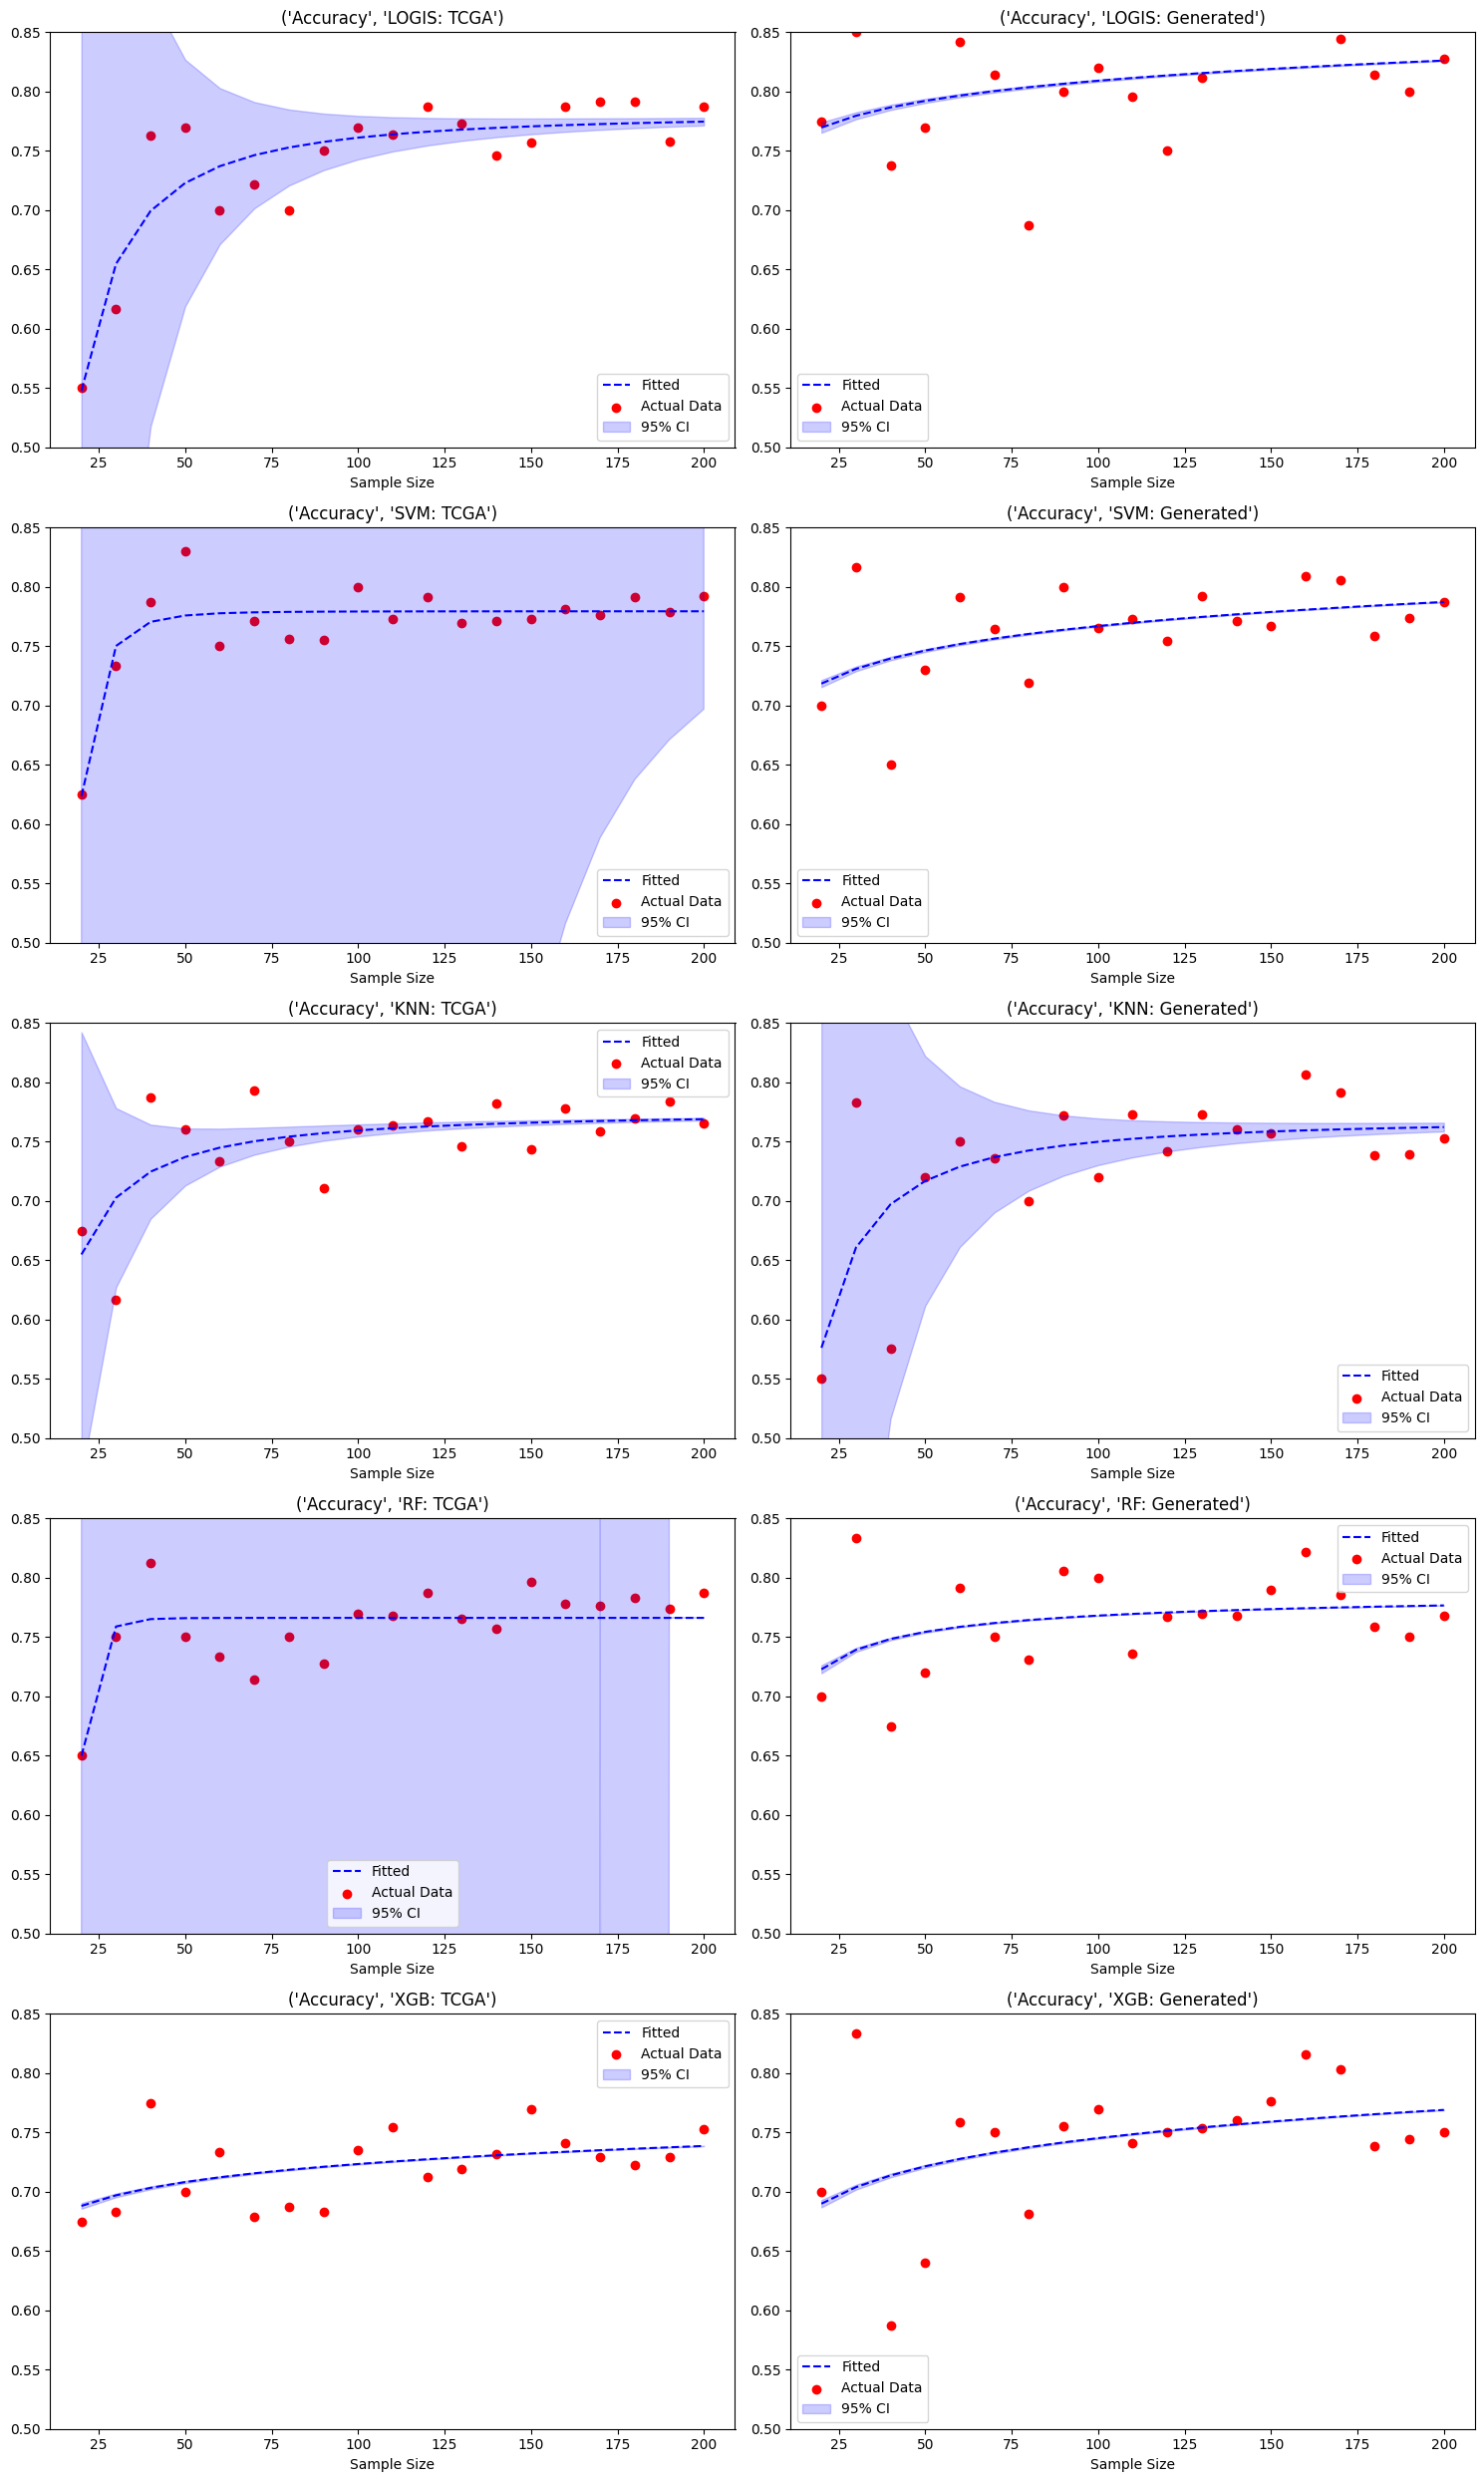

None


In [5]:
# Visualize the classifier performance
import matplotlib.pyplot as plt
p_acc = vis_classifier(metric_real=metric_real,
                       n_target=n_target,
                       metric_generated=metric_generated)

# Print the plot or result
print(p_acc)